In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
keras.__version__

'2.10.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
hid1 = model.layers[1]

In [11]:
model.get_layer('dense') is hid1

True

In [12]:
hid1.get_weights()

[array([[ 0.05929804,  0.06355093, -0.01135698, ...,  0.04511974,
          0.03163667, -0.03430772],
        [-0.01013827,  0.01567693, -0.05477124, ...,  0.00225955,
          0.04834915,  0.00175726],
        [-0.00139235,  0.01228368,  0.04015785, ...,  0.01810025,
         -0.05799886,  0.04655981],
        ...,
        [ 0.00307699,  0.07198466, -0.01636182, ...,  0.06241331,
         -0.02622407,  0.0150905 ],
        [-0.00238223, -0.00488541,  0.06846699, ..., -0.05025303,
          0.0511878 ,  0.0469598 ],
        [ 0.06346892, -0.04248867, -0.06112754, ...,  0.03469019,
          0.05616094,  0.02702876]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7190 - accuracy: 0.7625 - val_loss: 0.5301 - val_accuracy: 0.8144
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4916 - accuracy: 0.8297 - val_loss: 0.5265 - val_accuracy: 0.8056
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.8426 - val_loss: 0.4159 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4172 - accuracy: 0.8543 - val_loss: 0.4212 - val_accuracy: 0.8532
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3956 - accuracy: 0.8610 - val_loss: 0.3775 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8659 - val_loss: 0.3777 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8693 - val_loss: 0.3863 - val_accuracy:

<AxesSubplot:>

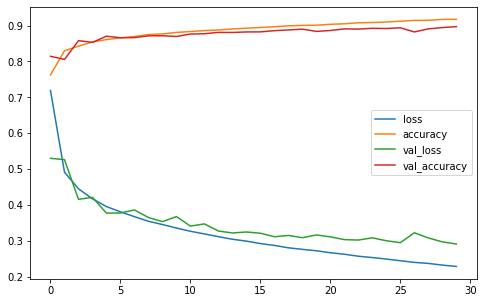

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [20]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8882


[0.3234429657459259, 0.8881999850273132]

In [24]:
X_new = X_test[:3]/255

In [25]:
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 63ms/step


In [26]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
housing = fetch_california_housing()

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [108]:
keras.backend.clear_session()

In [132]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                270       
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss='mean_squared_error',
             optimizer='sgd')

In [135]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5986 - val_loss: 0.5357
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5253 - val_loss: 0.6155
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4731 - val_loss: 0.7631
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4571 - val_loss: 0.9845
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 1.2020
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 1.5052
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4224 - val_loss: 1.6880
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4160 - val_loss: 1.9566
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4073 - val_loss: 2.1364
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 2.3286

In [136]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3749


In [137]:
mse_test

0.37494349479675293

In [138]:
X_new = X_test[:3]

In [139]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 44ms/step


In [140]:
y_pred

array([[0.8376633],
       [2.6049235],
       [4.8294578]], dtype=float32)

In [142]:
y_test[:3]

array([0.533  , 2.333  , 5.00001])

<AxesSubplot:>

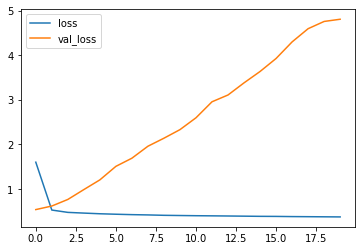

In [141]:
pd.DataFrame(history.history).plot()

In [176]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [210]:
keras.backend.clear_session()
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(70, activation='relu')(input_)
hidden2 = keras.layers.Dense(70, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1, activation='relu')(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss='mean_squared_error',
            optimizer=keras.optimizers.SGD(learning_rate=0.0003))

In [213]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5006 - val_loss: 0.4818
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4985 - val_loss: 0.4814
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4965 - val_loss: 0.4816
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4947 - val_loss: 0.4824
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4930 - val_loss: 0.4833


In [214]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4791


0.4791037440299988

In [215]:
model.predict(X_test[:3]) 

1/1 [==============================] - 0s 47ms/step


array([[0.73420274],
       [2.7520154 ],
       [4.906751  ]], dtype=float32)

In [216]:
y_test[:3]

array([0.533  , 2.333  , 5.00001])

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [43]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_4[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_4[0][0]',                
                                                                  'dense_7[0][0]']          

In [54]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005), loss='mean_squared_error')

In [58]:
model.fit(X_train, y_train, epochs=30, validation_data=[X_valid, y_valid])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2796 - val_loss: 0.3921
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2829 - val_loss: 0.3873
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2824 - val_loss: 0.4070
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2774 - val_loss: 0.4211
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2780 - val_loss: 0.4112
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2902 - val_loss: 0.3838
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2864 - val_loss: 0.3874
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2763 - val_loss: 0.4151
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2874 - val_loss: 0.3694
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2897 - val_loss: 0.3812

In [59]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4154


0.4154062569141388

In [61]:
model.predict(X_test[:3]), y_test[:3]

1/1 [==============================] - 0s 26ms/step


(array([[1.9429421],
        [2.1443338],
        [3.1356215]], dtype=float32),
 array([1.125, 2.365, 2.545]))

In [62]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [63]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           930         ['dense_9[0][0]']                
                                                                                            

In [64]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-3))

In [73]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [80]:
history = model.fit({'wide_input':X_train_A, 'deep_input':X_train_B}, y_train, epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)),
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4206 - val_loss: 0.4245
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4149 - val_loss: 0.4257
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4307
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4123 - val_loss: 0.4308
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4134 - val_loss: 0.4256
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4118 - val_loss: 0.4244
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4087 - val_loss: 0.4211
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4084 - val_loss: 0.4217
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4050 - val_loss: 0.4220
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4021 - val_loss: 0.4285

In [82]:
mse_test

0.45904725790023804

In [81]:
y_pred, y_test[:3]

(array([[1.9467719],
        [2.6801224],
        [3.2498624]], dtype=float32),
 array([1.125, 2.365, 2.545]))

In [88]:
inp_A = keras.layers.Input(shape=[5], name='wide_input')
inp_B = keras.layers.Input(shape=[6], name='deep_input')
hid1 = keras.layers.Dense(30, activation='relu')(inp_B)
hid2 = keras.layers.Dense(30, activation='relu')(hid1)
concat = keras.layers.Concatenate()([inp_B, hid2])
out_layer = keras.layers.Dense(1, name='output_layer')(concat)
aux_out = keras.layers.Dense(1, name='aux_output')(hid2)

model = keras.Model(inputs=[inp_A, inp_B], outputs=[out_layer, aux_out])

In [89]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 dense_23 (Dense)               (None, 30)           930         ['dense_22[0][0]']               
                                                                                                  
 concatenate_8 (Concatenate)    (None, 36)           0           ['deep_input[0][0]',             
                                                                  'dense_23[0][0]']         

In [123]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.5, 0.5], optimizer=keras.optimizers.SGD(learning_rate=0.005))

In [105]:
history = model.fit(
    [X_train_A, X_train_B],
    {'output_layer':y_train, 'aux_output':y_train}, epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3679 - output_layer_loss: 0.3675 - aux_output_loss: 0.3682 - val_loss: 0.4823 - val_output_layer_loss: 0.4837 - val_aux_output_loss: 0.4810
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3692 - output_layer_loss: 0.3701 - aux_output_loss: 0.3682 - val_loss: 0.5571 - val_output_layer_loss: 0.5665 - val_aux_output_loss: 0.5478
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3741 - output_layer_loss: 0.3799 - aux_output_loss: 0.3683 - val_loss: 0.5858 - val_output_layer_loss: 0.5844 - val_aux_output_loss: 0.5872
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3666 - output_layer_loss: 0.3670 - aux_output_loss: 0.3662 - val_loss: 0.4969 - val_output_layer_loss: 0.5060 - val_aux_output_loss: 0.4877
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3777 - output_layer_loss: 0.3888 - aux_output_loss: 0.3667 -

In [106]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.5506 - output_layer_loss: 0.5505 - aux_output_loss: 0.5507


[0.5505867004394531, 0.5505150556564331, 0.5506584048271179]

In [107]:
model.predict((X_test_A[:3], X_test_B[:3])), y_test[:3]

1/1 [==============================] - 0s 58ms/step


([array([[1.402185 ],
         [2.3814414],
         [3.593187 ]], dtype=float32),
  array([[1.4311949],
         [2.3674545],
         [3.6227407]], dtype=float32)],
 array([1.125, 2.365, 2.545]))

In [109]:
model.save('my_keras_model.h5')

In [110]:
model2 = keras.models.load_model('my_keras_model.h5')

In [116]:
model2.predict((X_test_A[:3], X_test_B[:3])), y_test[:3]

1/1 [==============================] - 0s 20ms/step


([array([[1.402185 ],
         [2.3814414],
         [3.593187 ]], dtype=float32),
  array([[1.4311949],
         [2.3674545],
         [3.6227407]], dtype=float32)],
 array([1.125, 2.365, 2.545]))

In [120]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit((X_train_A, X_train_B), (y_train,y_train), epochs=30, 
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
                    callbacks=[checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3426 - output_layer_loss: 0.3420 - aux_output_loss: 0.3432 - val_loss: 0.4393 - val_output_layer_loss: 0.4368 - val_aux_output_loss: 0.4419
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3423 - output_layer_loss: 0.3418 - aux_output_loss: 0.3428 - val_loss: 0.4878 - val_output_layer_loss: 0.4902 - val_aux_output_loss: 0.4854
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3410 - output_layer_loss: 0.3406 - aux_output_loss: 0.3415 - val_loss: 0.4586 - val_output_layer_loss: 0.4559 - val_aux_output_loss: 0.4613
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3395 - output_layer_loss: 0.3392 - aux_output_loss: 0.3398 - val_loss: 0.4151 - val_output_layer_loss: 0.4154 - val_aux_output_loss: 0.4148
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3407 - output_layer_loss: 0.3400 - aux_output_loss: 0.3413 -

In [121]:
model = keras.models.load_model('my_keras_model.h5')

In [122]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.5416 - output_layer_loss: 0.5423 - aux_output_loss: 0.5409


[0.5416127443313599, 0.5423080921173096, 0.5409177541732788]

In [126]:
early_stop = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit((X_train_A, X_train_B), (y_train,y_train), epochs=100, 
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
                    callbacks=[early_stop])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3274 - output_layer_loss: 0.3270 - aux_output_loss: 0.3278 - val_loss: 0.4436 - val_output_layer_loss: 0.4434 - val_aux_output_loss: 0.4438
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3278 - output_layer_loss: 0.3274 - aux_output_loss: 0.3282 - val_loss: 0.4447 - val_output_layer_loss: 0.4430 - val_aux_output_loss: 0.4464
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3267 - output_layer_loss: 0.3264 - aux_output_loss: 0.3269 - val_loss: 0.4489 - val_output_layer_loss: 0.4487 - val_aux_output_loss: 0.4491
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3269 - output_layer_loss: 0.3266 - aux_output_loss: 0.3273 - val_loss: 0.4416 - val_output_layer_loss: 0.4420 - val_aux_output_loss: 0.4412
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3266 - output_layer_loss: 0.3266 - aux_output_loss: 0.3

In [127]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.5289 - output_layer_loss: 0.5299 - aux_output_loss: 0.5279


[0.5288987159729004, 0.5298771858215332, 0.5279200077056885]

<AxesSubplot:>

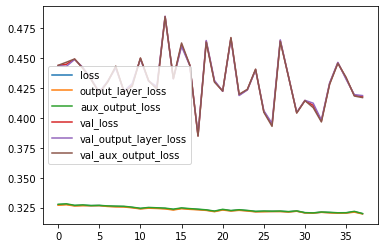

In [130]:
pd.DataFrame(history.history).plot()